In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list /content/drive/MyDrive/data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list /content/drive/MyDrive/data/sad/depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext list /content/drive/MyDrive/data/sad/depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext list /content/drive/MyDrive/data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list /content/drive/MyDrive/data/sad/sad-person-pictures-43vbzyaz0nlwlg1q.jpg
Image not in ext list /content/drive/MyDrive/data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list /content/drive/MyDrive/data/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Image not in ext list /content/drive/MyDrive/data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list /content/drive/MyDrive/data/sad/CC_HE_1221887081_SituationalDepressi

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 326 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [1.65747553e-02, 1.51654414e-03, 1.56862754e-02],
          [1.17647061e-02, 3.92156886e-03, 1.56862754e-02],
          [6.75551454e-03, 0.00000000e+00, 1.06770834e-02]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [1.77429207e-02, 1.92051311e-03, 1.63449757e-02],
          [1.26446895e-02, 4.46962845e-03, 1.63449757e-02],
          [2.02665441e-02, 6.58700999e-04, 1.63449757e-02]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [2.11243872e-02, 1.51654414e-03, 1.7202

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 19s 2s/step - loss: 164.9907 - accuracy: 0.4777 - val_loss: 4.6820 - val_accuracy: 0.6406
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 1.4734 - accuracy: 0.5938 - val_loss: 0.6320 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 12s 1s/step - loss: 0.5027 - accuracy: 0.7857 - val_loss: 0.4260 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 12s 1s/step - loss: 0.3801 - accuracy: 0.8527 - val_loss: 0.2787 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 16s 2s/step - loss: 0.2616 - accuracy: 0.8929 - val_loss: 0.2093 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.2180 - accuracy: 0.9152 - val_loss: 0.0896 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.1245 - accuracy: 0.9598 - val_loss: 0.0931 - val_accuracy: 0.9688
Epoch 8/20
7/7 [================

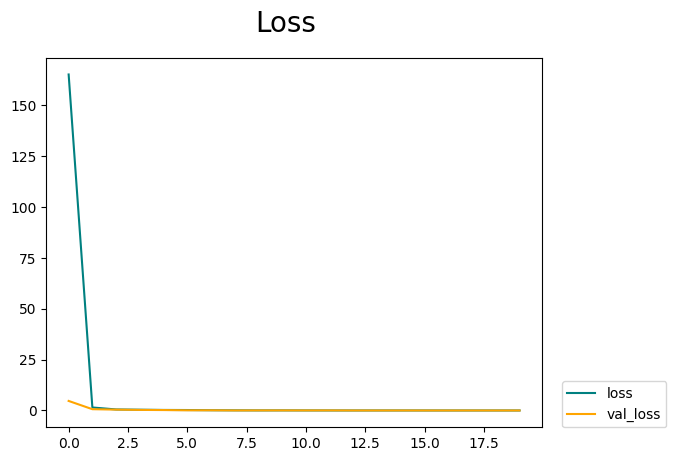

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc=(1.04, 0))
plt.show()

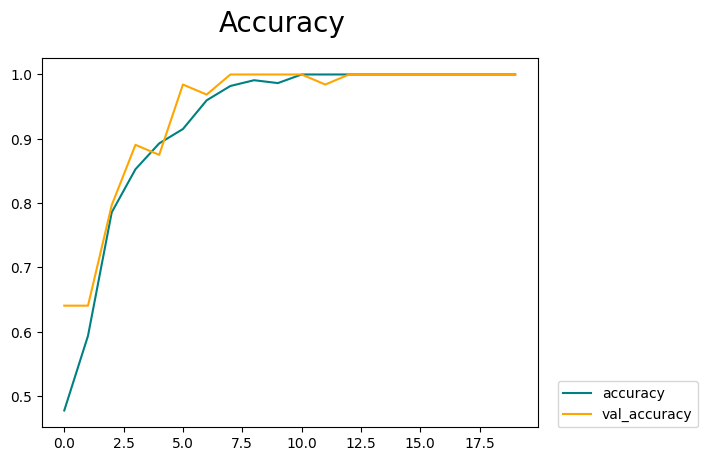

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc=(1.04, 0))
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 82ms/step


In [ ]:
model.save(os.path.join('/content/drive/MyDrive/models','imageclassifier.h5'))

In [ ]:
import cv2

In [ ]:
img = cv2.imread('test2.jpg')
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


1/1 [==============================] - 0s 43ms/step
Predicted class is Sad
